In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Clean the Census data

In [2]:
data = pd.read_csv('census_2011.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,Male_ST,Female_ST,Workers,Male_Workers,Female_Workers,Main_Workers,Marginal_Workers,Non_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Other_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,LPG_or_PNG_Households,Housholds_with_Electric_Lighting,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Below_Primary_Education,Primary_Education,Middle_Education,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_Bicycle,Households_with_Car_Jeep_Van,Households_with_Radio_Transistor,Households_with_Scooter_Motorcycle_Moped,Households_with_Telephone_Mobile_Phone_Landline_only,Households_with_Telephone_Mobile_Phone_Mobile_only,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Households_with_Telephone_Mobile_Phone_Both,Condition_of_occupied_census_houses_Dilapidated_Households,Households_with_separate_kitchen_Cooking_inside_house,Having_bathing_facility_Total_Households,Having_latrine_facility_within_the_premises_Total_Households,Ownership_Owned_Households,Ownership_Rented_Households,Type_of_bathing_facility_Enclosure_without_roof_Households,Type_of_fuel_used_for_cooking_Any_other_Households,Type_of_latrine_facility_Pit_latrine_Households,Type_of_latrine_facility_Other_latrine_Households,Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households,Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households,Not_having_bathing_facility_within_the_premises_Total_Households,Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households,Main_source_of_drinking_water_Un_covered_well_Households,Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households,Main_source_of_drinking_water_Spring_Households,Main_source_of_drinking_water_River_Canal_Households,Main_source_of_drinking_water_Other_sources_Households,Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households,Location_of_drinking_water_source_Near_the_premises_Households,Location_of_drinking_water_source_Within_the_premises_Households,Main_source_of_drinking_water_Tank_Pond_Lake_Households,Main_source_of_drinking_water_Tapwater_Households,Main_source_of_drinking_water_Tubewell_Borehole_Households,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households,Location_of_drinking_water_source_Away_Households,Married_couples_1_Households,Married_couples_2_Households,Married_couples_3_Households,Married_couples_3_or_more_Households,Married_couples_4_Households,Married_couples_5__Households,Married_couples_None_Households,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,1046.0,2.0,70352.0,36913.0,33439.0,229064.0,190899.0,38165.0,123837.0,105227.0,641290.0,34680.0,56759.0,7946.0,129679.0,37128.0,823286.0,1700.0,5600.0,66.0,39.0,13.0,2522.0,15828.0,83071.0,762.0,5256.0,158438.0,NaN,181664.0,60616.0,101642.0,99947.0,74948.0,39709.0,21751.0,6402.0,405015.0,289765.0,694780.0,6007

In [5]:
data.columns = [c.replace(' ','_') for c in data.columns]

In [6]:
data.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

#### Problem Statement 1: (Keep the relevant data)

In [7]:
colList =['State_name','District_name','Population','Male','Female','Male_Literate','Literate','Female_Literate','Rural_Households','Urban_Households','Households','Age_Group_0_29','Age_Group_30_49','Age_Group_50','Age_not_stated']

In [8]:
data = data[colList]

In [9]:
data

,State_name,District_name,Population,Male,Female,Male_Literate,Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age_not_stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,282823.0,439654.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,207741.0,335649.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,62834.0,93770.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,56301.0,NaN,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,163333.0,261724.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,PONDICHERRY,Mahe,41816.0,19143.0,22673.0,16610.0,36470.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,PONDICHERRY,Karaikal,200222.0,97809.0,102413.0,79903.0,154916.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842.0,20727.0,NaN,15397.0,25332.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597.0,54861.0,50736.0,43186.0,78683.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


#### Problem Statement 2: (Rename the Column names)

In [10]:
newCol = {
    "State_name": "State/UT",
    "District_name": "District",
    "Male_Literate": "Literate_Male",
    "Female_Literate": "Literate_Female",
    "Rural_Households": "Households_Rural",
    "Urban_ Households": "Households_Urban",
    "Age_Group_0_29": "Young_and_Adult",
    "Age_Group_30_49": "Middle_Aged",
    "Age_Group_50": "Senior_Citizen",
    "Age_not_stated": "Age_Not_Stated",
}

In [11]:
data = data.rename(columns=newCol)

In [12]:
data

,State/UT,District,Population,Male,Female,Literate_Male,Literate,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,282823.0,439654.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,207741.0,335649.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,62834.0,93770.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,56301.0,NaN,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,163333.0,261724.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,PONDICHERRY,Mahe,41816.0,19143.0,22673.0,16610.0,36470.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,PONDICHERRY,Karaikal,200222.0,97809.0,102413.0,79903.0,154916.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842.0,20727.0,NaN,15397.0,25332.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597.0,54861.0,50736.0,43186.0,78683.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


#### Problem Statement 3: (Rename State/UT Names)

In [13]:
def formating(name):
    list1 = []
    list2 = name.split(' ')
    for i in list2:
        if i == 'and' or i == 'AND':
            list1.append(i.lower())
        else:
            list1.append(i[0].upper() + i[1:].lower())
    return ' '.join(list1)

In [14]:
data['State/UT'] = data['State/UT'].apply(formating)

In [15]:
data

,State/UT,District,Population,Male,Female,Literate_Male,Literate,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,282823.0,439654.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,207741.0,335649.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,62834.0,93770.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu and Kashmir,Kargil,140802.0,NaN,63017.0,56301.0,NaN,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,163333.0,261724.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,16610.0,36470.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,79903.0,154916.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,NaN,15397.0,25332.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,43186.0,78683.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


#### Problem Statement 4: (New State/UT formation)

In [16]:
dList = ['Adilabad','Nizamabad','Karimnagar','Medak','Hyderabad','Rangareddy','Mahbubnagar','Nalgonda','Warangal','Khammam']

for i in range(len(data)):
    if data.loc[i, 'District'] in dList:
        data.loc[i, 'State/UT'] = 'Telangana'

In [17]:
dList = ['Leh(Ladakh)','Kargil']

for i in range(len(data)):
    if data.loc[i, 'District'] in dList:
        data.loc[i, 'State/UT'] = 'Laddakh'

In [18]:
data

,State/UT,District,Population,Male,Female,Literate_Male,Literate,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,282823.0,439654.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,207741.0,335649.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,62834.0,93770.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,56301.0,NaN,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,163333.0,261724.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,16610.0,36470.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,79903.0,154916.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,NaN,15397.0,25332.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,43186.0,78683.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [19]:
dList = ['Leh(Ladakh)']

for i in range(len(data)):
    if data.loc[i, 'District'] in dList:
        data.loc[i, 'District'] = 'Leh'

In [20]:
data

,State/UT,District,Population,Male,Female,Literate_Male,Literate,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,282823.0,439654.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,207741.0,335649.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh,133487.0,78971.0,54516.0,62834.0,93770.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,56301.0,NaN,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,163333.0,261724.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,16610.0,36470.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,79903.0,154916.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,NaN,15397.0,25332.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,43186.0,78683.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


#### Problem Statement 5: (Find and process Missing Data)

In [21]:
data.isnull().sum()

State/UT             0
District             0
Population          30
Male                30
Female              33
Literate_Male       31
Literate            36
Literate_Female     27
Households_Rural    42
Urban_Households    33
Households          32
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [22]:
data.columns

Index(['State/UT', 'District', 'Population', 'Male', 'Female', 'Literate_Male',
       'Literate', 'Literate_Female', 'Households_Rural', 'Urban_Households',
       'Households', 'Young_and_Adult', 'Middle_Aged', 'Senior_Citizen',
       'Age_Not_Stated'],
      dtype='object')

In [23]:
mp = []
for i in data.columns:
    per = (data[i].isnull().sum()/640)*100
    mp.append(per)
    print(f'Percentage of missing data in column {i} is {per}')

Percentage of missing data in column State/UT is 0.0
Percentage of missing data in column District is 0.0
Percentage of missing data in column Population is 4.6875
Percentage of missing data in column Male is 4.6875
Percentage of missing data in column Female is 5.15625
Percentage of missing data in column Literate_Male is 4.84375
Percentage of missing data in column Literate is 5.625
Percentage of missing data in column Literate_Female is 4.21875
Percentage of missing data in column Households_Rural is 6.5625
Percentage of missing data in column Urban_Households is 5.15625
Percentage of missing data in column Households is 5.0
Percentage of missing data in column Young_and_Adult is 4.84375
Percentage of missing data in column Middle_Aged is 4.6875
Percentage of missing data in column Senior_Citizen is 4.84375
Percentage of missing data in column Age_Not_Stated is 5.46875


In [24]:
for i in data.columns:
    data[i].fillna(0, inplace = True)

In [25]:
for i in range(len(data)):
    if data['Population'][i] == 0:
        data['Population'][i] = data['Male'][i] + data['Female'][i]
    if data['Male'][i] == 0:
        data['Male'][i] = data['Population'][i] - data['Female'][i]
    if data['Female'][i] == 0:
        data['Female'][i] = data['Population'][i] - data['Male'][i]
    if data['Literate'][i] == 0:
        data['Literate'][i] = data['Literate_Male'][i] + data['Literate_Female'][i]
    if data['Literate_Male'][i] == 0:
        data['Literate_Male'][i] = data['Literate'][i] - data['Literate_Female'][i]
    if data['Literate_Female'][i] == 0:
        data['Literate_Female'][i] = data['Literate'][i] - data['Literate_Male'][i]
    if data['Households'][i] == 0:
        data['Households'][i] = data['Households_Rural'][i] + data['Urban_Households'][i]
    if data['Households_Rural'][i] == 0:
        data['Households_Rural'][i] = data['Households'][i] + data['Urban_Households'][i]
    if data['Urban_Households'][i] == 0:
        data['Urban_Households'][i] = data['Households'][i] + data['Households_Rural'][i]
    if data['Young_and_Adult'][i] == 0:
        data['Young_and_Adult'][i] = data['Population'][i] -(data['Middle_Aged'][i] + data['Senior_Citizen'][i] + data['Age_Not_Stated'][i])
    if data['Middle_Aged'][i] == 0:
        data['Middle_Aged'][i] = data['Population'][i] -(data['Young_and_Adult'][i] + data['Senior_Citizen'][i] + data['Age_Not_Stated'][i])
    if data['Senior_Citizen'][i] == 0:
        data['Senior_Citizen'][i] = data['Population'][i] -(data['Young_and_Adult'][i] + data['Middle_Aged'][i] + data['Age_Not_Stated'][i])
    if data['Age_Not_Stated'][i] == 0:
        data['Age_Not_Stated'][i] = data['Population'][i] -(data['Young_and_Adult'][i] + data['Middle_Aged'][i] + data['Senior_Citizen'][i])
    

C:\Users\jayja\AppData\Local\Temp\ipykernel_7884\852372705.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Urban_Households'][i] = data['Households'][i] + data['Households_Rural'][i]
C:\Users\jayja\AppData\Local\Temp\ipykernel_7884\852372705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Male'][i] = data['Population'][i] - data['Female'][i]
C:\Users\jayja\AppData\Local\Temp\ipykernel_7884\852372705.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [26]:
data

,State/UT,District,Population,Male,Female,Literate_Male,Literate,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,282823.0,439654.0,156831.0,158438.0,340102.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,207741.0,335649.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh,133487.0,78971.0,54516.0,62834.0,93770.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,56301.0,86236.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,163333.0,261724.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,16610.0,36470.0,19860.0,24220.0,12110.0,12110.0,19760.0,12543.0,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,79903.0,154916.0,75013.0,35618.0,33715.0,69333.0,139767.0,60089.0,0.0,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,15397.0,25332.0,9935.0,15958.0,31916.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,43186.0,78683.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [27]:
for i in data.columns:
    data[i].replace(0,np.nan,inplace = True)

In [28]:
nmp = []
for i in data.columns:
    per = (data[i].isnull().sum()/640)*100
    nmp.append(per)
    print(f'Percentage of missing data in column {i} is {per}')

Percentage of missing data in column State/UT is 0.0
Percentage of missing data in column District is 0.0
Percentage of missing data in column Population is 0.0
Percentage of missing data in column Male is 0.15625
Percentage of missing data in column Female is 0.0
Percentage of missing data in column Literate_Male is 0.15625
Percentage of missing data in column Literate is 0.0
Percentage of missing data in column Literate_Female is 0.3125
Percentage of missing data in column Households_Rural is 0.0
Percentage of missing data in column Urban_Households is 0.0
Percentage of missing data in column Households is 0.0
Percentage of missing data in column Young_and_Adult is 0.0
Percentage of missing data in column Middle_Aged is 0.15625
Percentage of missing data in column Senior_Citizen is 0.9375
Percentage of missing data in column Age_Not_Stated is 0.46875


<BarContainer object of 15 artists>

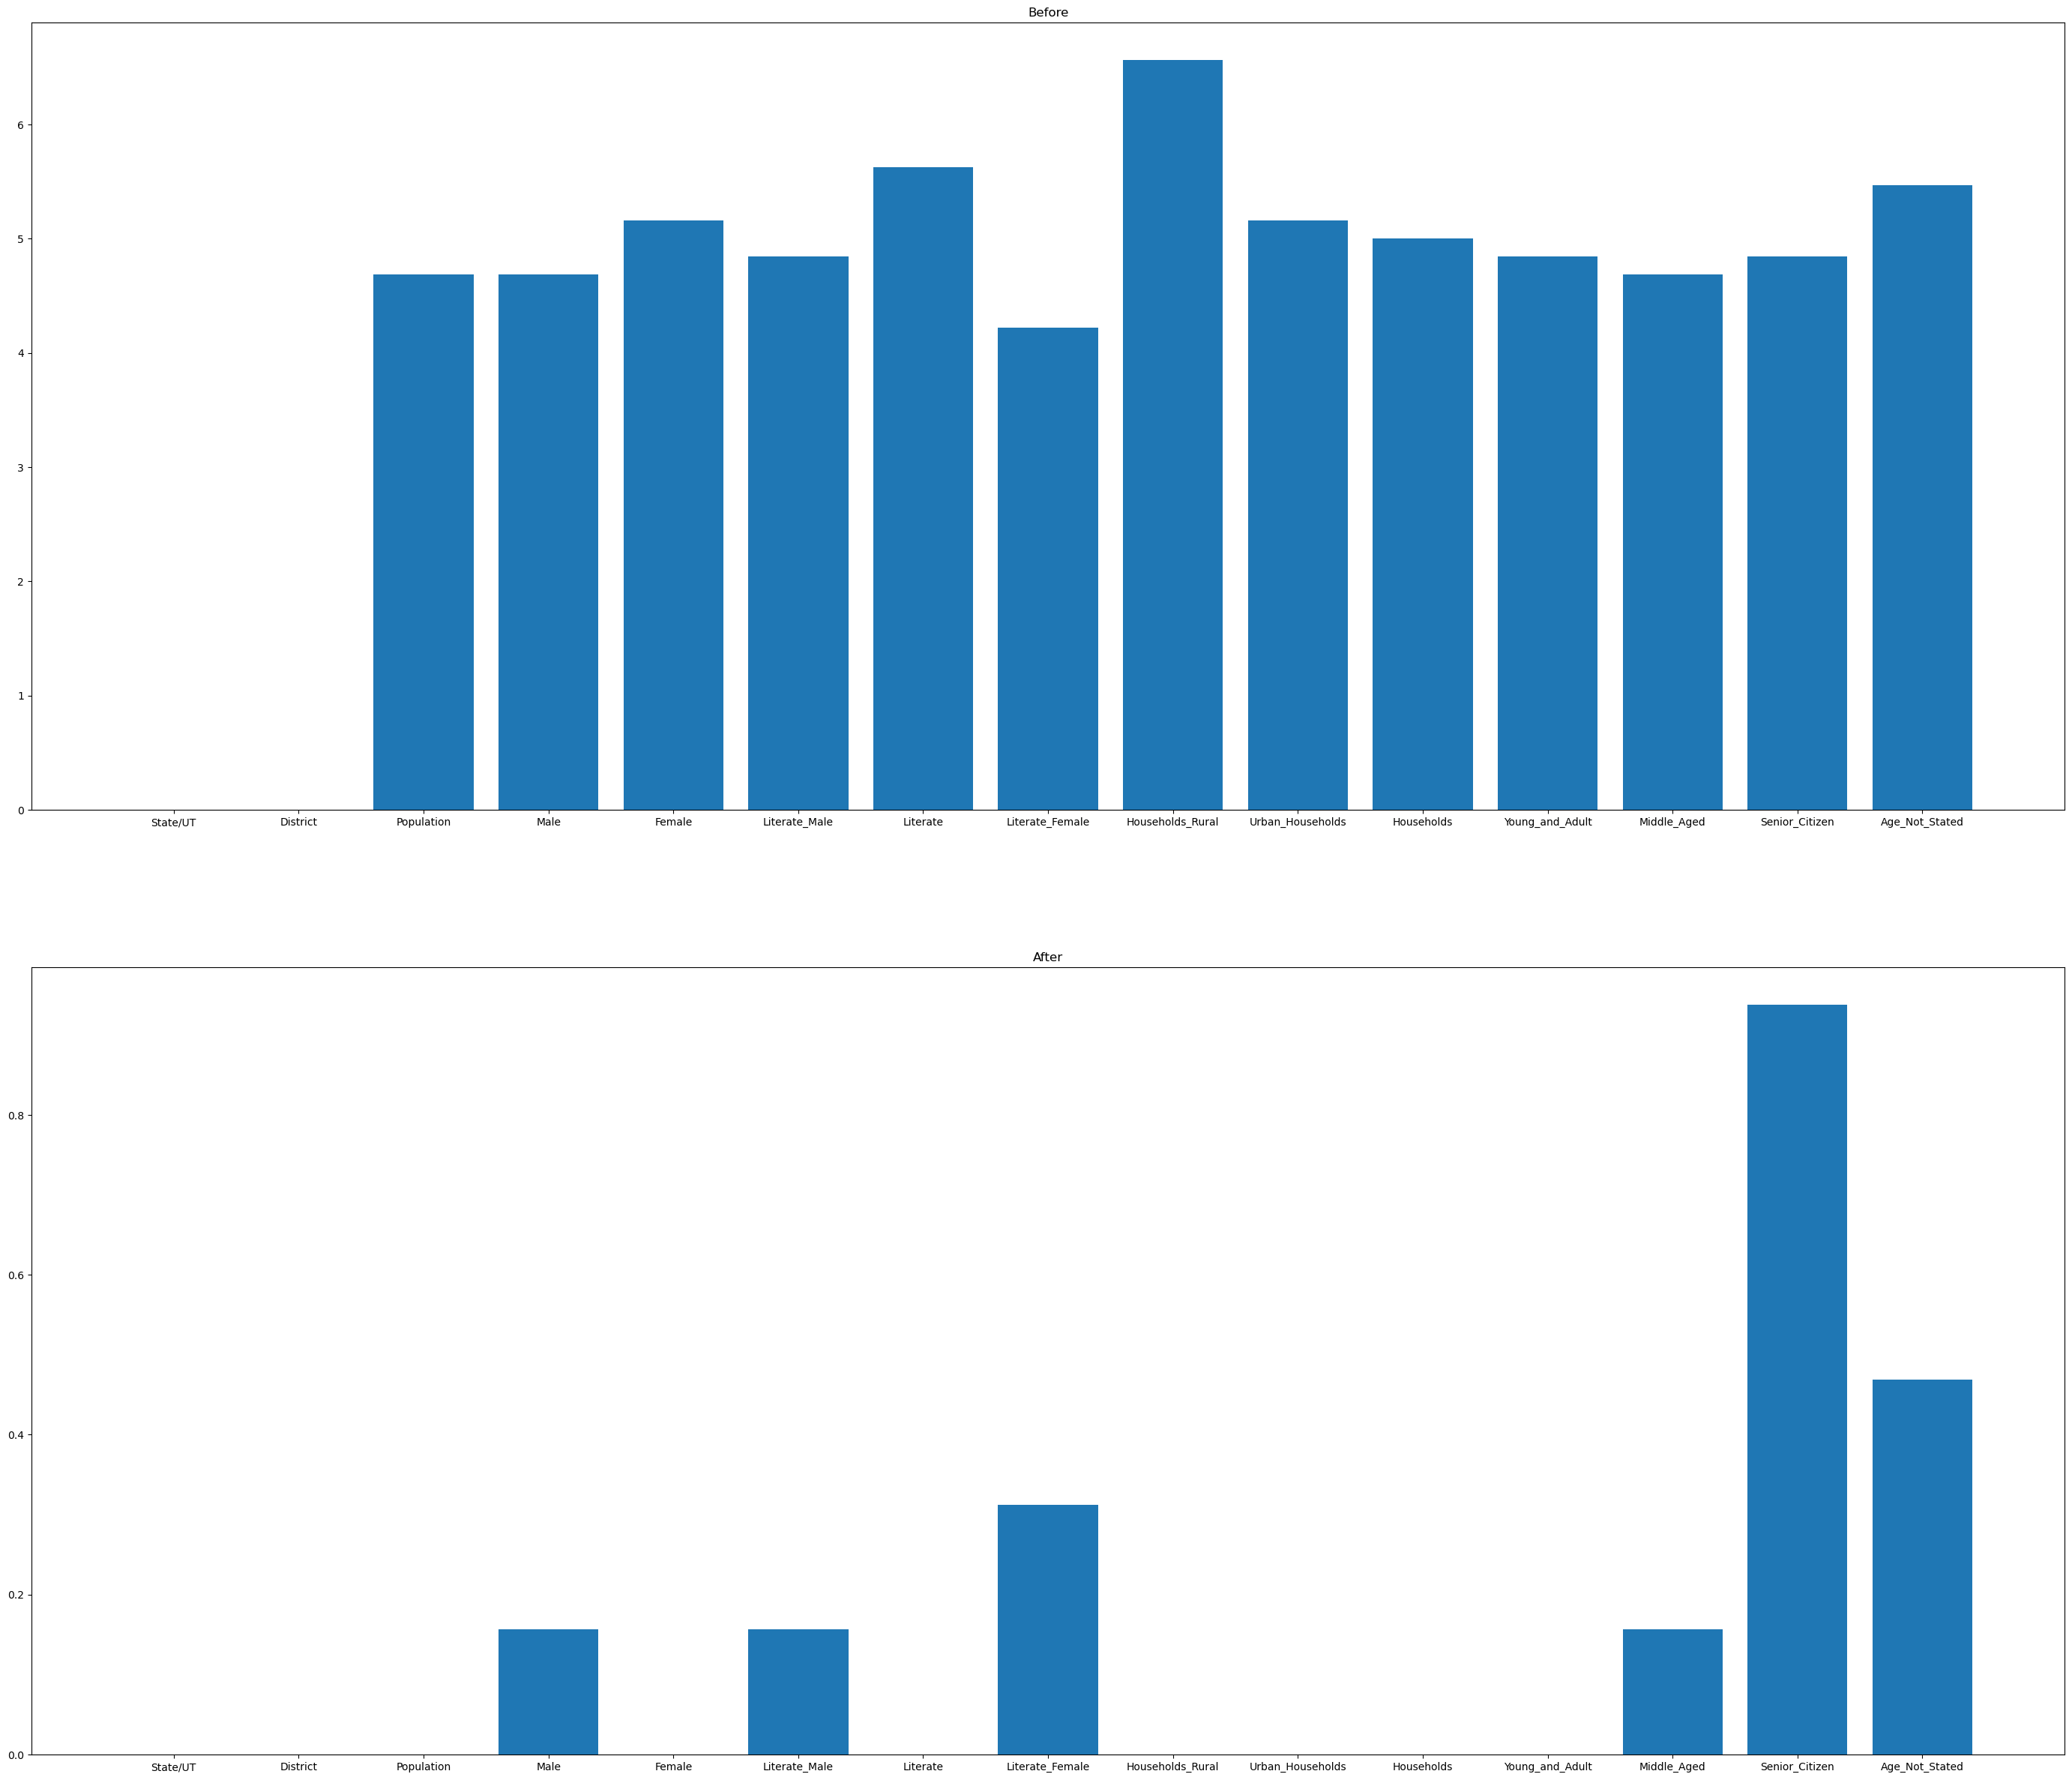

In [29]:
fig,ax=plt.subplots(2,1,figsize=(35,30))
ax[0].set_title('Before')
ax[1].set_title('After')
ax[0].bar(data.columns,mp,)
ax[1].bar(data.columns,nmp)

#### Problem Statement 6: (Save Data)

In [30]:
data.to_csv('clean_census_2011.csv', index = False)

In [31]:
df = pd.read_csv('clean_census_2011.csv')

In [32]:
df

,State/UT,District,Population,Male,Female,Literate_Male,Literate,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,282823.0,439654.0,156831.0,158438.0,340102.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,207741.0,335649.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh,133487.0,78971.0,54516.0,62834.0,93770.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,56301.0,86236.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,163333.0,261724.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,16610.0,36470.0,19860.0,24220.0,12110.0,12110.0,19760.0,12543.0,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,79903.0,154916.0,75013.0,35618.0,33715.0,69333.0,139767.0,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,15397.0,25332.0,9935.0,15958.0,31916.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,43186.0,78683.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


### Extract Information from the housing data along with the census data

In [33]:
data = pd.read_csv('housing.csv')

In [34]:
data

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,Total Number of households,Total Number of Good,Total Number of Livable,Total Number of Dilapidated,Total Number of Residence households,Total Number of Residence Good,Total Number of Residence Livable,Total Number of Residence Dilapidated,Total Number of Residence cum other,Number of Residence cum Good,Residence_cum_Livable,Residence_cum_Dilapidated,Material_Roof_GTBW,Material_Roof_PP,Material_Roof_HMT,Material_Roof_MMT,Material_Roof_BB,Material_Roof_SS,Material_Roof_GMAS,Material_Roof_Concrete,Material_Roof_AOM,Material_Roof_GTB,Material_Roof_PP1,Material_Roof_MUB,Material_Roof_Wood,Material_Wall_SNPWM,Material_Wall_SPWM,Material_Wall_GIMAS,Material_Wall_Bb,Material_Wall_Concrete,Material_Wall_AOM,Material_Floor_Mud,Material_Floor_WB,Material_Floor_BB,Material_Floor_Stone,Material_Floor_Cement,Material_Floor_MF,Material_Floor_AOM,Dwelling_R_NER,Dwelling_R_OR,Dwelling_R_TR,Dwelling_R_TH_R,Dwelling_R_FR,Dwelling_R_FI_R,Dwelling_R_SRA,H_size_1,H_size_2,H_size_3,H_size_4,H_size_5,H_size_6_8,H_size_9,O_status_O,O_status_R,O_status_AO,Married_C_N,Married_C_1,Married_C_2,Married_C_3,Married_C_4,Married_C_5,DW_TFTS,DW_TFUS,DW_CW,DW_UW,DW_Handpump,DW_TB,DW_Spring,DW_RC,DW_TPL,DW_OS,Within_premises,Near_premises,Away,MSL_Electricty,MSL_Kerosene,MSL_SE,MSL_OO,MSL_AO,MSL_NL,Latrine_premise,Latrine_PSS,Latrine_ST,Latrine_OS,Pit_latrine_SVI,Pit_latrine_SOP,disposed_drain,Service_Latrine_NRH,Service_Latrine_NSA,H_latrine_premoses,Alternative_Source,Alternative_Source_Open,Households_Bathroom,Households_EWR,Households_No,Waste_water_CD,Waste_water_OD,Waste_water_ND,Cooking_FW,Cooking_CR,Cooking_CC,Cooking_CLC,Cooking_kerosene,Cooking_LPG_PNG,Cooking_Electricity,Cooking_Biogas,Cooking_AO,Cooking_NC,Total,Cooking_IH,Has_kitchen,DNHK,Cooking_OH,has_kitchen1,DNH_Kitchen,No_Cooking,TNHAB,assets_RT,assets_Tel,assets_CL_WI,assets_CLWI,assets_TM_LO,assets_TM_MO,assets_TM_Both,assets_Bicycle,assets_SMM,assets_CJV,Household_TV_LP,None_AS,Permanents,Semi_Permanent,Total_Temporary,Serviceable,Non_Serviceable,Unclassifiable,TC_VC,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0,7.1,1.1,7.8,0.1,0.3,0.2,0.1,1.1,87.1,0.6,2.6,0.5,0.4,11.1,31.1,7.3,2.2,0.3,44.7,1.4,1.0,55.9,6.6,0.3,3.6,33.5,0.1,0.1,2.7,21.3,27.0,25.3,12.8,3.5,7.3,0.8,3.8,5.9,10.0,13.9,40.3,25.2,98.2,0.4,1.4,8.4,75.6,13.6,2.0,0.3,0.1,11.8,33.5,5.0,10.7,2.8,1.7,1.8,24.8,1.6,6.2,19.0,36.0,45.0,76.5,11.1,3.0,1.2,4.9,3.2,48.9,4.6,4.4,10.2,2.8,6.3,2.2,17.8,0.7,51.1,8.1,43.0,57.9,3.4,38.7,3.6,25.5,70.9,82.9,2.6,0.9,0.0,0.7,11.7,0.1,0.9,0.2,0.1,100,97.4,93.7,3.7,2.5,0.9,1.5,0.1,49.1,54.4,23.1,0.6,4.0,1.2,49.4,1.2,2.7,1.6,2.5,0.4,26.1,52.9,37.7,6.0,5.6,0.4,3.4,0,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9,7.1,1.0,7.3,0.1,0.3,0.2,0.1,1.1,87.5,0.7,2.6,0.5,0.4,11.4,28.6,7.9,2.4,0.3,46.2,1.4,1.0,53.7,6.3,0.4,3.5,36.0,0.1,0.0,2.7,20.6,27.0,25.7,12.8,3.6,7.6,0.9,3.8,6.0,10.0,13.9,40.0,25.4,98.2,0.6,1.3,8.4,75.5,13.7,2.1,0.3,0.1,13.0,34.1,5.1,10.4,2.8,1.9,1.8,23.2,1.5,6.2,21.3,35.4,43.2,77.8,10.4,2.8,1.1,4.8,3.1,50.9,4.8,6.2,10.2,3.0,6.2,2.1,17.6,0.8,49.1,7.8,41.3,58.7,3.4,37.9,3.8,27.1,69.1,79.9,2.4,0.8,0.0,0.8,14.8,0.1,0.9,0.2,0.1,100,97.6,94.0,3.5,2.3,0.9,1.4,0.1,50.2,55.7,25.1,0.7,4.2,1.4,50.0,1.5,2.8,1.7,2.8,0.5,25.0,55.1,36.0,5.6,5.2,0.4,3.3,0,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,100,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7,7.3,0.2,2.9,0.2,0.4,0.0,0.1,0.8,91.3,2.0,2.2,0.4,0.2,14.0,4.8,13.2,4.6,0.2,60.6,0.8,1.2,32.3,3.3,1.1,2.7,60.5,0.1,

#### Problem Statement 7: (Process the relevant data)

In [35]:
colList =['District Name','Rural/Urban','Total Number of households','Total Number of Livable','Total Number of Dilapidated','Latrine_premise']

In [36]:
data = data[colList]

In [37]:
data

,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,Total,100,44.7,3.8,84.3
...,...,...,...,...,...,...
1903,North & Middle Andaman,Total,100,44.6,2.8,48.3
1904,North & Middle Andaman,Urban,100,55.9,6.6,56.1
1905,South Andaman,Rural,100,33.5,3.5,64.7
1906,South Andaman,Total,100,26.4,2.2,78.3


In [38]:
data.columns = [c.replace(' ','_') for c in data.columns]

In [39]:
data

,District_Name,Rural/Urban,Total_Number_of_households,Total_Number_of_Livable,Total_Number_of_Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,Total,100,44.7,3.8,84.3
...,...,...,...,...,...,...
1903,North & Middle Andaman,Total,100,44.6,2.8,48.3
1904,North & Middle Andaman,Urban,100,55.9,6.6,56.1
1905,South Andaman,Rural,100,33.5,3.5,64.7
1906,South Andaman,Total,100,26.4,2.2,78.3


In [41]:
#data['District_Name'] = data['District_Name'].apply(formating)
#df['District'] = df['District'].apply(formating)

In [82]:
newDf = data[['District_Name','Households_Rural', 'Households_Urban']].copy()

KeyError: "['Households_Rural', 'Households_Urban'] not in index"

In [76]:
newDf['Households_Rural'] = newDf['Total_Number_of_households'] * (newDf['Total_Number_of_Dilapidated'] / 100)
newDf['Households_Urban'] = newDf['Total_Number_of_households'] * (newDf['Total_Number_of_Livable'] / 100)
newDf['Households_Rural_Dilapidated'] = newDf['Households_Rural']
newDf['Households_Rural_Livable'] = newDf['Total_Number_of_households'] - newDf['Households_Rural']
newDf['Households_Urban_Livable'] = newDf['Households_Urban']
newDf['Households_Urban_Dilapidated'] = newDf['Total_Number_of_households'] - newDf['Households_Urban']
newDf['Households_Rural_Toilet_Premise'] = newDf['Households_Rural'] * (newDf['Latrine_premise'] / 100)
newDf['Households_Urban_Toilet_Premise'] = newDf['Households_Urban'] * (newDf['Latrine_premise'] / 100)

In [77]:
newDf.rename(columns={'District Name': 'District'}, inplace=True)


In [78]:
newDf

,State/UT,District,Population,Male,Female,Literate_Male,Literate,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,District_Name,Rural/Urban,Total_Number_of_households,Total_Number_of_Livable,Total_Number_of_Dilapidated,Latrine_premise,Households_Urban,Households_Rural_Dilapidated,Households_Rural_Livable,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban_Toilet_Premise
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,282823.0,439654.0,156831.0,8.3,340102.0,181664.0,600759.0,178435.0,89679.0,1481.0,Kupwara,Rural,100,58.1,8.3,48.9,58.1,8.3,91.7,58.1,41.9,4.0587,28.4109
1,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,282823.0,439654.0,156831.0,7.9,340102.0,181664.0,600759.0,178435.0,89679.0,1481.0,Kupwara,Total,100,57.3,7.9,50.9,57.3,7.9,92.1,57.3,42.7,4.0211,29.1657
2,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,282823.0,439654.0,156831.0,4.8,340102.0,181664.0,600759.0,178435.0,89679.0,1481.0,Kupwara,Urban,100,49.5,4.8,70.2,49.5,4.8,95.2,49.5,50.5,3.3696,34.7490
3,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,207741.0,335649.0,127908.0,3.9,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Badgam,Rural,100,46.3,3.9,83.3,46.3,3.9,96.1,46.3,53.7,3.2487,38.5679
4,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,207741.0,335649.0,127908.0,3.8,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Badgam,Total,100,44.7,3.8,84.3,44.7,3.8,96.2,44.7,55.3,3.2034,37.6821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,15397.0,25332.0,9935.0,1.2,31916.0,15958.0,18786.0,12088.0,5922.0,46.0,Nicobars,Rural,100,23.8,1.2,80.9,23.8,1.2,98.8,23.8,76.2,0.9708,19.2542
1923,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,15397.0,25332.0,9935.0,1.2,31916.0,15958.0,18786.0,12088.0,5922.0,46.0,Nicobars,Total,100,23.8,1.2,80.9,23.8,1.2,98.8,23.8,76.2,0.9708,19.2542
1924,Andaman and Nicobar Islands,South Andaman,238142.0,127283.0,110859.0,105794.0,190266.0,84472.0,3.5,50631.0,85532.0,128402.0,76332.0,33128.0,280.0,South Andaman,Rural,100,33.5,3.5,64.7,33.5,3.5,96.5,33.5,66.5,2.2645,21.6745
1925,Andaman and Nicobar Islands,South Andaman,238142.0,127283.0,110859.0,105794.0,190266.0,84472.0,2.2,50631.0,85532.0,128402.0,76332.0,33128.0,280.0,South Andaman,Total,100,26.4,2.2,78.3,26.4,2.2,97.8,26.4,73.6,1.7226,20.6712


In [79]:
cols = ['District', 'Households_Rural', 'Households_Rural_Livable', 'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise', 'Households_Urban', 'Households_Urban_Livable', 'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise']
newDf = newDf[cols]

In [80]:
newDf

,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Kupwara,8.3,91.7,8.3,4.0587,58.1,58.1,41.9,28.4109
1,Kupwara,7.9,92.1,7.9,4.0211,57.3,57.3,42.7,29.1657
2,Kupwara,4.8,95.2,4.8,3.3696,49.5,49.5,50.5,34.7490
3,Badgam,3.9,96.1,3.9,3.2487,46.3,46.3,53.7,38.5679
4,Badgam,3.8,96.2,3.8,3.2034,44.7,44.7,55.3,37.6821
...,...,...,...,...,...,...,...,...,...
1922,Nicobars,1.2,98.8,1.2,0.9708,23.8,23.8,76.2,19.2542
1923,Nicobars,1.2,98.8,1.2,0.9708,23.8,23.8,76.2,19.2542
1924,South Andaman,3.5,96.5,3.5,2.2645,33.5,33.5,66.5,21.6745
1925,South Andaman,2.2,97.8,2.2,1.7226,26.4,26.4,73.6,20.6712
